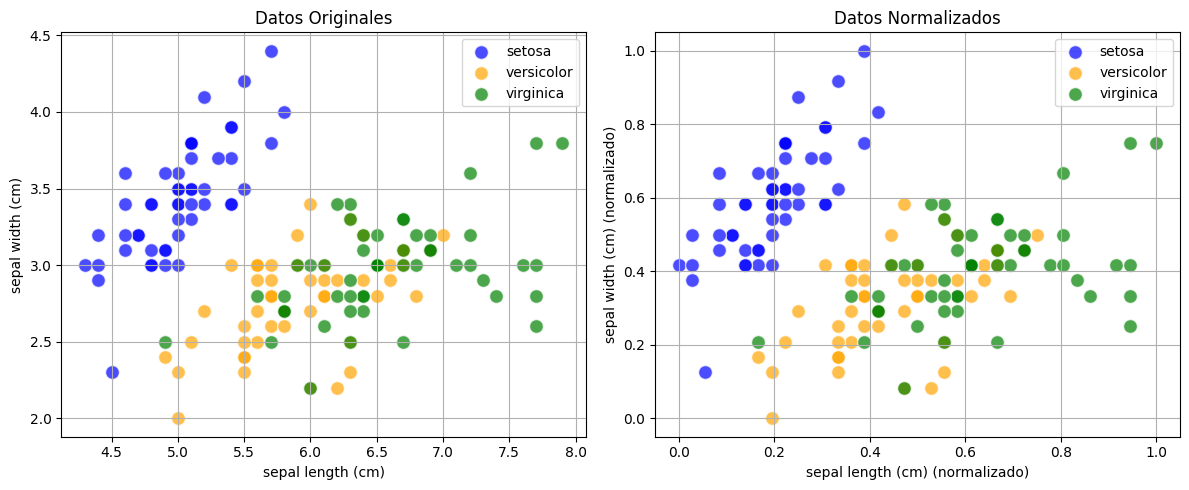

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Cargar el dataset iris
iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

# Crear el objeto escalador
scaler = MinMaxScaler()

# Ajustar y transformar los datos
normalized_data = scaler.fit_transform(data)

# Elegir las características a graficar (Longitud y ancho del sépalo)
x_idx, y_idx = 0, 1
feature_x, feature_y = iris.feature_names[x_idx], iris.feature_names[y_idx]

# Crear la figura y los ejes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Definir colores y etiquetas
colors = ['blue', 'orange', 'green']
labels = target_names

# Función para graficar
def scatter_plot(ax, x_data, y_data, title, xlabel, ylabel):
    for i, color, label in zip(range(len(labels)), colors, labels):
        ax.scatter(x_data[target == i], y_data[target == i], color=color, label=label, alpha=0.7, edgecolors='w', s=100)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

# Graficar los datos originales
scatter_plot(axs[0], data[:, x_idx], data[:, y_idx], "Datos Originales", feature_x, feature_y)

# Graficar los datos normalizados
scatter_plot(axs[1], normalized_data[:, x_idx], normalized_data[:, y_idx], "Datos Normalizados", feature_x + " (normalizado)", feature_y + " (normalizado)")

# Ajustar el layout y mostrar los gráficos
plt.tight_layout()
plt.show()


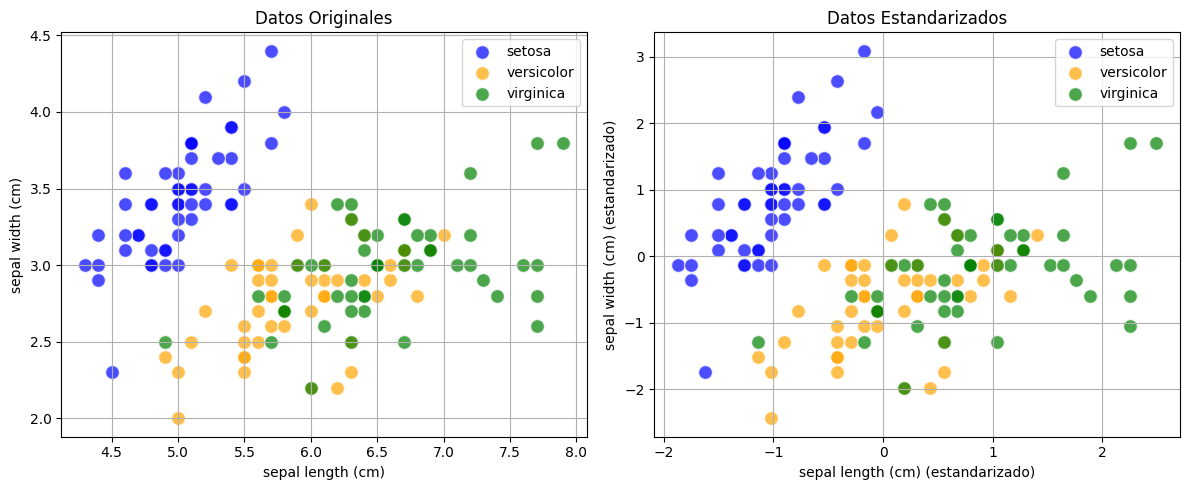

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Cargar el dataset iris
iris = load_iris()
data = iris.data

# Crear el objeto escalador para estandarización
scaler = StandardScaler()

# Ajustar y transformar los datos
standardized_data = scaler.fit_transform(data)

# Elegir las características a graficar (Longitud y ancho del sépalo)
x_idx, y_idx = 0, 1
feature_x, feature_y = iris.feature_names[x_idx], iris.feature_names[y_idx]

# Crear la figura y los ejes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Definir colores y etiquetas
colors = ['blue', 'orange', 'green']
labels = iris.target_names

# Función para graficar
def scatter_plot(ax, x_data, y_data, title, xlabel, ylabel):
    for i, color, label in zip(range(len(labels)), colors, labels):
        ax.scatter(x_data[iris.target == i], y_data[iris.target == i], color=color, label=label, alpha=0.7, edgecolors='w', s=100)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)

# Graficar los datos originales
scatter_plot(axs[0], data[:, x_idx], data[:, y_idx], "Datos Originales", feature_x, feature_y)

# Graficar los datos estandarizados
scatter_plot(axs[1], standardized_data[:, x_idx], standardized_data[:, y_idx], "Datos Estandarizados", feature_x + " (estandarizado)", feature_y + " (estandarizado)")

# Ajustar el layout y mostrar los gráficos
plt.tight_layout()
plt.show()


Clases originales: Counter({0: 475, 1: 25})
Clases después de SMOTE: Counter({0: 475, 1: 475})


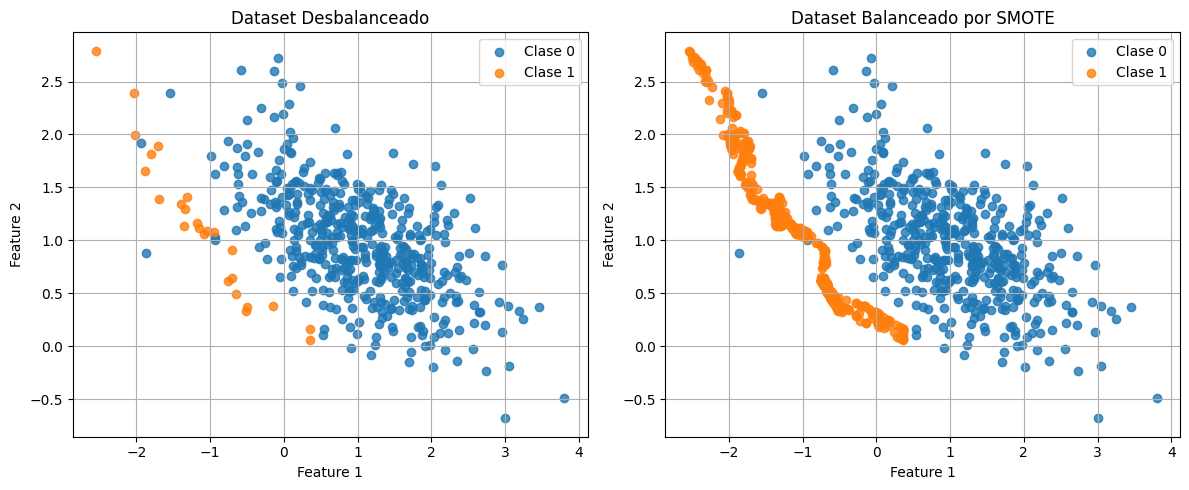

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

# Crear un dataset desbalanceado de ejemplo
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           weights=[0.95], flip_y=0, random_state=1)

# Verificar el balance inicial de clases
print("Clases originales:", Counter(y))

# Aplicar SMOTE para balancear las clases
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar el balance después de aplicar SMOTE
print("Clases después de SMOTE:", Counter(y_resampled))

# Graficar el dataset desbalanceado y balanceado
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Clase 0', alpha=0.8)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Clase 1', alpha=0.8)
plt.title('Dataset Desbalanceado')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Clase 0', alpha=0.8)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Clase 1', alpha=0.8)
plt.title('Dataset Balanceado por SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
